# Setup

## Imports Necessary Libraries

In [1]:
# ---------- Import Essential Libraries ---------- #

# Machine Learning Essentials #
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# import splitfolders 
import pathlib
from pathlib import Path

# Python Utils #
import copy

# Other #


## Inputs and Folders

In [2]:
# Globals / Settings
KAGGLE_INPUT   = '/kaggle/input'
DATA_METADATA  = '/kaggle/input/brian-tumor-dataset/metadata.csv'
DATA_DIRECTORY = '/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set'


# New Data Thing

In [3]:
# Define the directories and labels for both folders of images 

directories = {
    "Brain Tumor": '/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor',
    "Healthy":  '/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy'
}

# Create list of filepaths and a list of labels 
filepaths = []
labels = [] 

# Iterate through the directories and collect the file paths and labels 
for label, path in directories.items():
    for name in os.listdir(path):
        filepaths.append(os.path.join(path, name))
        labels.append(label)


# Create a dataframe with the file paths and the labels 

df = pd.DataFrame({"filepaths": filepaths, "labels": labels})




In [4]:
df.head()

,filepaths,labels
0,/kaggle/input/brian-tumor-dataset/Brain Tumor ...,Brain Tumor
1,/kaggle/input/brian-tumor-dataset/Brain Tumor ...,Brain Tumor
2,/kaggle/input/brian-tumor-dataset/Brain Tumor ...,Brain Tumor
3,/kaggle/input/brian-tumor-dataset/Brain Tumor ...,Brain Tumor
4,/kaggle/input/brian-tumor-dataset/Brain Tumor ...,Brain Tumor


## Split data into training, testing, and validation sets

In [5]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42,stratify=df.labels)
train_df, val_df = train_test_split(train_df, test_size=0.15, random_state=42,stratify=train_df.labels)
print(f"Training set is of shape {train_df.shape}")
print(f"Testing set is of shape {test_df.shape}")
print(f"Validation set is of shape {val_df.shape}")



Training set is of shape (2932, 2)
Testing set is of shape (1150, 2)
Validation set is of shape (518, 2)


# Preprocess Images 

### Enhance the image 
If time permits, increase contrast using cv2.addWeighted, Sharpen with a kernek using OpenCV's filter2D function, and a couple other operations 

In [6]:
# Add code to enhance the image if it makes the model perform better 

# Data Generators (Batching, Data Augmentation, On-the-fly-processing, and flow control) 

In [7]:
# Use tensorflows ImageDataGenerator to preprocess the images 

# rescale parameter will scale pixel values to the range [0,1] 
image_generator = ImageDataGenerator(
    rescale=1./255 # Normalize image pixel values from [0,255] to [0,1]
)

# Create a data generator for the training set
train = image_generator.flow_from_dataframe(
    dataframe=train_df,         # DataFrame containing file paths and labels for training data
    x_col="filepaths",          # Column in the DataFrame with the file paths to the images
    y_col="labels",             # Column in the DataFrame with the labels for the images
    target_size=(256, 256),     # Resize all images to 256x256 pixels
    color_mode='rgb',           # Load images in RGB format (3 color channels)
    class_mode="categorical",   # Generate one-hot encoded labels for multi-class classification
    batch_size=64,              # Number of images to generate per batch
    shuffle=False               # Do not shuffle the order of images in this generator
)

# Create a data generator for the test set
test = image_generator.flow_from_dataframe(
    dataframe=test_df,          # DataFrame containing file paths and labels for test data
    x_col="filepaths",          # Column in the DataFrame with the file paths to the images
    y_col="labels",             # Column in the DataFrame with the labels for the images
    target_size=(256, 256),     # Resize all images to 256x256 pixels
    color_mode='rgb',           # Load images in RGB format
    class_mode="categorical",   # Generate one-hot encoded labels for evaluation
    batch_size=64,              # Number of images to generate per batch
    shuffle=False               # Do not shuffle the order, as this is for testing
)

# Create a data generator for the validation set
val = image_generator.flow_from_dataframe(
    dataframe=val_df,           # DataFrame containing file paths and labels for validation data
    x_col="filepaths",          # Column in the DataFrame with the file paths to the images
    y_col="labels",             # Column in the DataFrame with the labels for the images
    target_size=(256, 256),     # Resize all images to 256x256 pixels
    color_mode='rgb',           # Load images in RGB format
    class_mode="categorical",   # Generate one-hot encoded labels for validation
    batch_size=64,              # Number of images to generate per batch
    shuffle=False               # Do not shuffle the order, as this is for validation
)


Found 2932 validated image filenames belonging to 2 classes.
Found 1150 validated image filenames belonging to 2 classes.
Found 518 validated image filenames belonging to 2 classes.


# TODO Show Certain Number of images from each class 

In [8]:
#TODO Code to show certain number of images from each class


# Create CNN and Compile the model (TODO deepdive into other implementation and understand code better and revise and make our own later) 

## Don't use ChatGPT Bullshit

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),  # First Conv Layer
    MaxPooling2D((2, 2)),                                               # Max Pooling
    Conv2D(64, (3, 3), activation='relu'),                              # Second Conv Layer
    MaxPooling2D((2, 2)),                                               # Max Pooling
    Conv2D(128, (3, 3), activation='relu'),                             # Third Conv Layer
    MaxPooling2D((2, 2)),                                               # Max Pooling
    Flatten(),                                                          # Flatten the output
    Dense(128, activation='relu'),                                      # Fully Connected Layer
    Dropout(0.5),                                                       # Dropout for regularization
    Dense(len(train.class_indices), activation='softmax')               # Output layer with softmax activation
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',   # Since it's multi-class classification
    metrics=['accuracy']
)

# Summary of the model architecture
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,234 (56.61 MB)

 Trainable params: 14,839,234 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [10]:
# Train the model
history = model.fit(
    train,                           # Training data
    epochs=10,                        # Number of epochs
    validation_data=val,              # Validation data
    steps_per_epoch=train.samples // train.batch_size,    # Steps per epoch
    validation_steps=val.samples // val.batch_size,        # Validation steps
    verbose=1
)

# Save the trained model (optional)
model.save('cnn_model.h5')


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step - accuracy: 0.6217 - loss: 0.8927 - val_accuracy: 0.8164 - val_loss: 0.4475
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6875 - loss: 0.5446 - val_accuracy: 0.5000 - val_loss: 0.6200
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


45/45 ━━━━━━━━━━━━━━━━━━━━ 221s 5s/step - accuracy: 0.8281 - loss: 0.3939 - val_accuracy: 0.8730 - val_loss: 0.2800
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8594 - loss: 0.3033 - val_accuracy: 0.8333 - val_loss: 0.3856
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 221s 5s/step - accuracy: 0.8989 - loss: 0.2613 - val_accuracy: 0.9102 - val_loss: 0.2132
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9375 - loss: 0.1543 - val_accuracy: 0.8333 - val_loss: 0.3627
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 220s 5s/step - accuracy: 0.9441 - loss: 0.1566 - val_accuracy: 0.9414 - val_loss: 0.1737
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9688 - loss: 0.0632 - val_accuracy: 0.8333 - val_loss: 0.3527
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 221s 5s/step - accuracy: 0.9672 - loss: 0.0950 - val_accuracy: 0.9434 - val_loss: 0.1850
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.0669 - val_accuracy: 0.8333 - val_loss: 0.389

In [11]:
loss, accuracy = model.evaluate(test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9414 - loss: 0.1474
Test Loss: 0.16359619796276093
Test Accuracy: 0.9426087141036987


## Create plots of training and validation accuracy as a fucntion of the number of apochs as well as training and validation as a function of the number of epochs

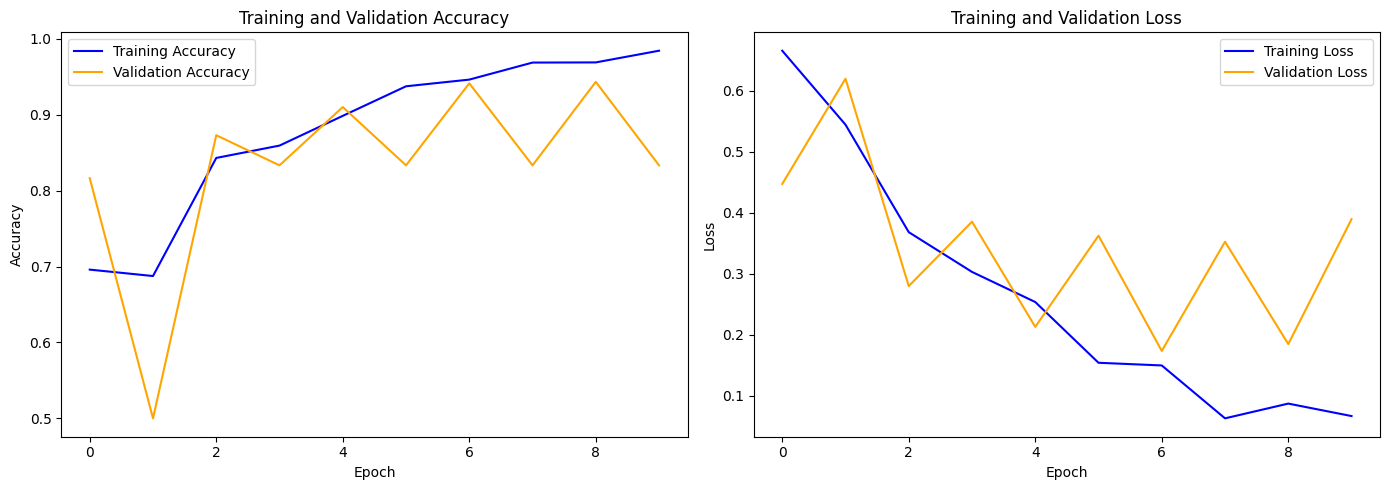

In [12]:
import matplotlib.pyplot as plt

# Retrieve accuracy and loss data from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure with two subplots: one for accuracy and one for loss
plt.figure(figsize=(14, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


# Create Confusion Matrix


18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step


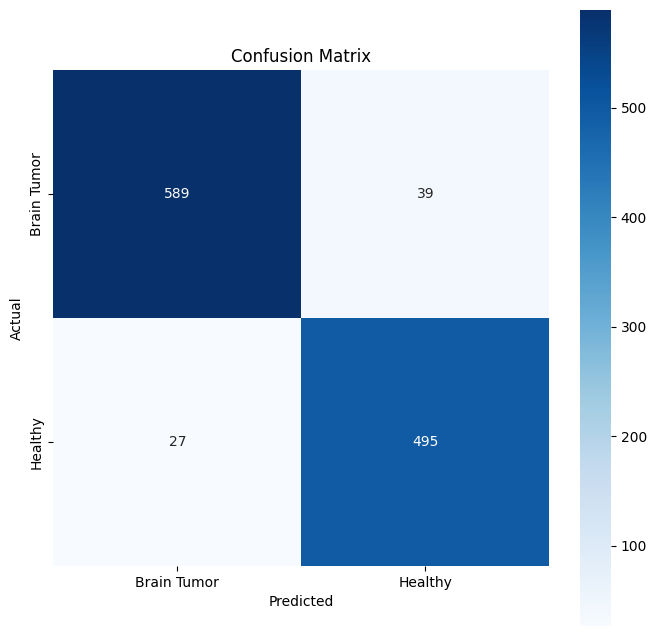

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions for the test data
y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test data
true_classes = test.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, y_pred_classes)

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True, 
            xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## What we know so far: 
The model is working and it is around 94.7% accurate. 

## Kaggle Setup

In [14]:
# List files in input directory
input_files = []

for dirname, _, filenames in os.walk(KAGGLE_INPUT):
    for filename in filenames:
        input_files.append(os.path.join(dirname, filename))

# Display the first n files, then indicate if more exist
display_count = 20

print("Files in '/kaggle/input':")
print("\n".join(input_files[:display_count]))
if len(input_files) > display_count:
    print("...")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Files in '/kaggle/input':
/kaggle/input/brian-tumor-dataset/metadata_rgb_only.csv
/kaggle/input/brian-tumor-dataset/metadata.csv
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (489).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (72).tif
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2411).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1065).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1014).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (385).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1822).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (2023).jpg
/kaggle/input/brian-tumor-d

## Helpers

In [15]:
# ---------- Data Visualization Helpers ---------- #
"""
view_df_head() ---------------- print sample data from df
view_df_summary_pie_chart() --- print pie chart summary
view_df_summary_table() ------- print table summary
view_df_summary() ------------- shortcut to view head+pie+table summary with one call

See below for extra documentation and use examples.
"""

def view_df_head(df, title=None):
    if title: 
        print(f"{title}:")
    print(df.head().to_markdown(),'\n')

def view_df_summary_pie_chart(df=None, cc=None, title=None, size=2):
    """
    Helper to visualize dataset makeup with a pie chart
    """
    
    # Handle Parameters
    if df is not None: 
        class_data = df['class'].value_counts()
    
    elif cc is not None: 
        class_data = cc
    
    else: 
        raise ValueError("Provide input data frame (df) or class counts (cc).")

    # -- Plot --
    # Setup Figure
    fig, ax = plt.subplots(figsize=(size,size))  # Pie chart size can be controlled here
    # Plot the pie chart
    ax.pie(class_data, labels=class_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    # Equal aspect ratio ensures the pie chart is drawn as a circle
    ax.axis('equal')
    # Display the pie chart and optional title
    if title: 
        print(f"{title}:")
    plt.show()

def view_df_summary_table(df, title=None):
    """
    Generates a summary table of class counts from the given DataFrame
    """
    # ----- Fetch and Calculate Summary Data ----- #
    
    # Get class-count + total_count data
    class_counts = df['class'].value_counts()
    total_count = class_counts.sum()
    # Calculate percentages based on class-count data
    percentages = (class_counts / total_count * 100).round(1)  # Round percentages
    
    # Calculate and append "Total" row
    class_counts = pd.concat([class_counts, pd.Series({"Total": total_count})])
    percentages = pd.concat([percentages, pd.Series({"Total": 100.0})])

    # ----- Format and Prepare Summary Data ----- #
    
     # Populate data dictionary
    data = {
        "Attribute": class_counts.index.tolist(),
        "Count": class_counts.values.tolist(),
        "Percentage (%)": percentages.values.tolist()
    }

    # Convert to DataFrame info_df
    info_df = pd.DataFrame(data)

    # ----- Display Summary Data ----- #
    
    # Display title if available
    if title: info_df.name = title
    
    # Display info_df with fancy format
    if title: print(f"{info_df.name}:")
    print(info_df.to_markdown(index=False, tablefmt="fancy_grid"))

def view_df_summary(df, title=None, pie_size=2):
    """
    Helper to print a table and a pie chart to summarize a given DataFrame
    """
    view_df_summary_table(df, title=f"Summary") 
    view_df_summary_pie_chart(df, title=f"Pie Chart", size=pie_size)
    view_df_head(df, title=f"Sample Data")
    print()

# ---------- Example Uses, Templates, Documentation ---------- #

# # Example Uses:
# view_df_head(df, "optional title")
# view_df_summary_table(df, "optional title")
# view_df_summary_pie_chart(df, title="optional title", size=2)
# view_df_summary(df)

# # Flexible Template to Copy and Use:
# print("DataTitle:",'\n')
# view_df_head(labels_df, "Sample Data")
# view_df_summary_table(labels_df, "Summary")
# print('\n')

# Data

**Description writeup:** TODO

## Load Data

In [16]:
# Load Data into DataFrame
labels_df = pd.read_csv(DATA_METADATA)

Full Dataset: 

Data Summary:
╒═════════════╤═════════╤══════════════════╕
│ Attribute   │   Count │   Percentage (%) │
╞═════════════╪═════════╪══════════════════╡
│ tumor       │    2513 │             54.6 │
├─────────────┼─────────┼──────────────────┤
│ normal      │    2087 │             45.4 │
├─────────────┼─────────┼──────────────────┤
│ Total       │    4600 │            100   │
╘═════════════╧═════════╧══════════════════╛


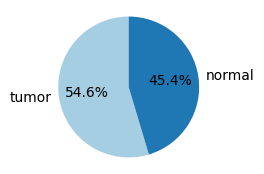

Sample Data:
|    |   Unnamed: 0 | image           | class   | format   | mode   | shape         |
|---:|-------------:|:----------------|:--------|:---------|:-------|:--------------|
|  0 |            0 | Cancer (1).jpg  | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  1 |            1 | Cancer (1).png  | tumor   | PNG      | L      | (300, 240)    |
|  2 |            2 | Cancer (1).tif  | tumor   | TIFF     | RGB    | (256, 256, 3) |
|  3 |            3 | Cancer (10).jpg | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  4 |            4 | Cancer (10).tif | tumor   | TIFF     | RGB    | (256, 256, 3) | 





In [17]:
# Visualize Data:
print("Full Dataset:",'\n')
view_df_summary_table(labels_df, "Data Summary")
view_df_summary_pie_chart(labels_df, "Pie Chart")
view_df_head(labels_df, "Sample Data")
print('\n')

## Split Data

In [18]:
# Define the paths to each folder

# Get all the image extensions 
# Possibly change to regular expression if needed 
image_extensions = ['*.jpeg', '*.jpg', '*.JPG', '*.png', '*.tif']


brain_tumor_dir = Path(DATA_DIRECTORY) / "Brain Tumor"
healthy_dir = Path(DATA_DIRECTORY) / "Healthy"
print(f"brain_tumor_dir = {brain_tumor_dir}\n")
print(f"healthy_dir = {healthy_dir}\n")


brain_tumor_images = []
healthy_brain_images = []

# Iterate over image extensions list and get all the images from the two folders
for ext in image_extensions: 
    brain_tumor_images.extend(brain_tumor_dir.glob(ext))  # Add all matching files to the list
    healthy_brain_images.extend(healthy_dir.glob(ext))  # Add all matching files to the list

# Verify that the images were collected proporly 
print(f"Number of Brain Tumor Images: {len(brain_tumor_images)}")
print(f"Number of Healthy Images: {len(healthy_brain_images)}")


# Split the data using train_test_split from sklearn 
brain_tumor_train, brain_tumor_test = train_test_split(brain_tumor_images, test_size=0.2, random_state=69)
healthy_train, healthy_test = train_test_split(healthy_brain_images, test_size=0.2, random_state=69)

# Combine both healthy and non healthy images into to training and testing 
train_images = brain_tumor_train + healthy_train 
test_images = brain_tumor_test + healthy_test
train_image_percentage = len(train_images)/(len(train_images) + len(test_images))
test_image_percentage = len(test_images)/(len(train_images) + len(test_images))

# Verify the number of images in training and testing sets as well as percentage with respect to all images in dataset
print(f"Number of Training Images: {len(train_images)}")
print(f"Number of Testing Images: {len(test_images)}")
print(f"Training set has: {train_image_percentage} % of the images")
print(f"Testing set has: {test_image_percentage} % of the images")



brain_tumor_dir = /kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor

healthy_dir = /kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy

Number of Brain Tumor Images: 2513
Number of Healthy Images: 2087
Number of Training Images: 3679
Number of Testing Images: 921
Training set has: 0.7997826086956522 % of the images
Testing set has: 0.20021739130434782 % of the images


## Create Seperate directories for training and testing to simplify workflow

In [19]:
# TODO 

## Process Data -> Torch / Tensorflow / etc

# Create Convolutional Neural Network